<a href="https://colab.research.google.com/github/ShubhaVS/DataScience/blob/main/cvlab2q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the Tesla logo:


Saving tesla_logo_PNG16.png to tesla_logo_PNG16 (5).png
Upload the background image:


Saving Tesla-PNG-High-Quality-Image.png to Tesla-PNG-High-Quality-Image (5).png


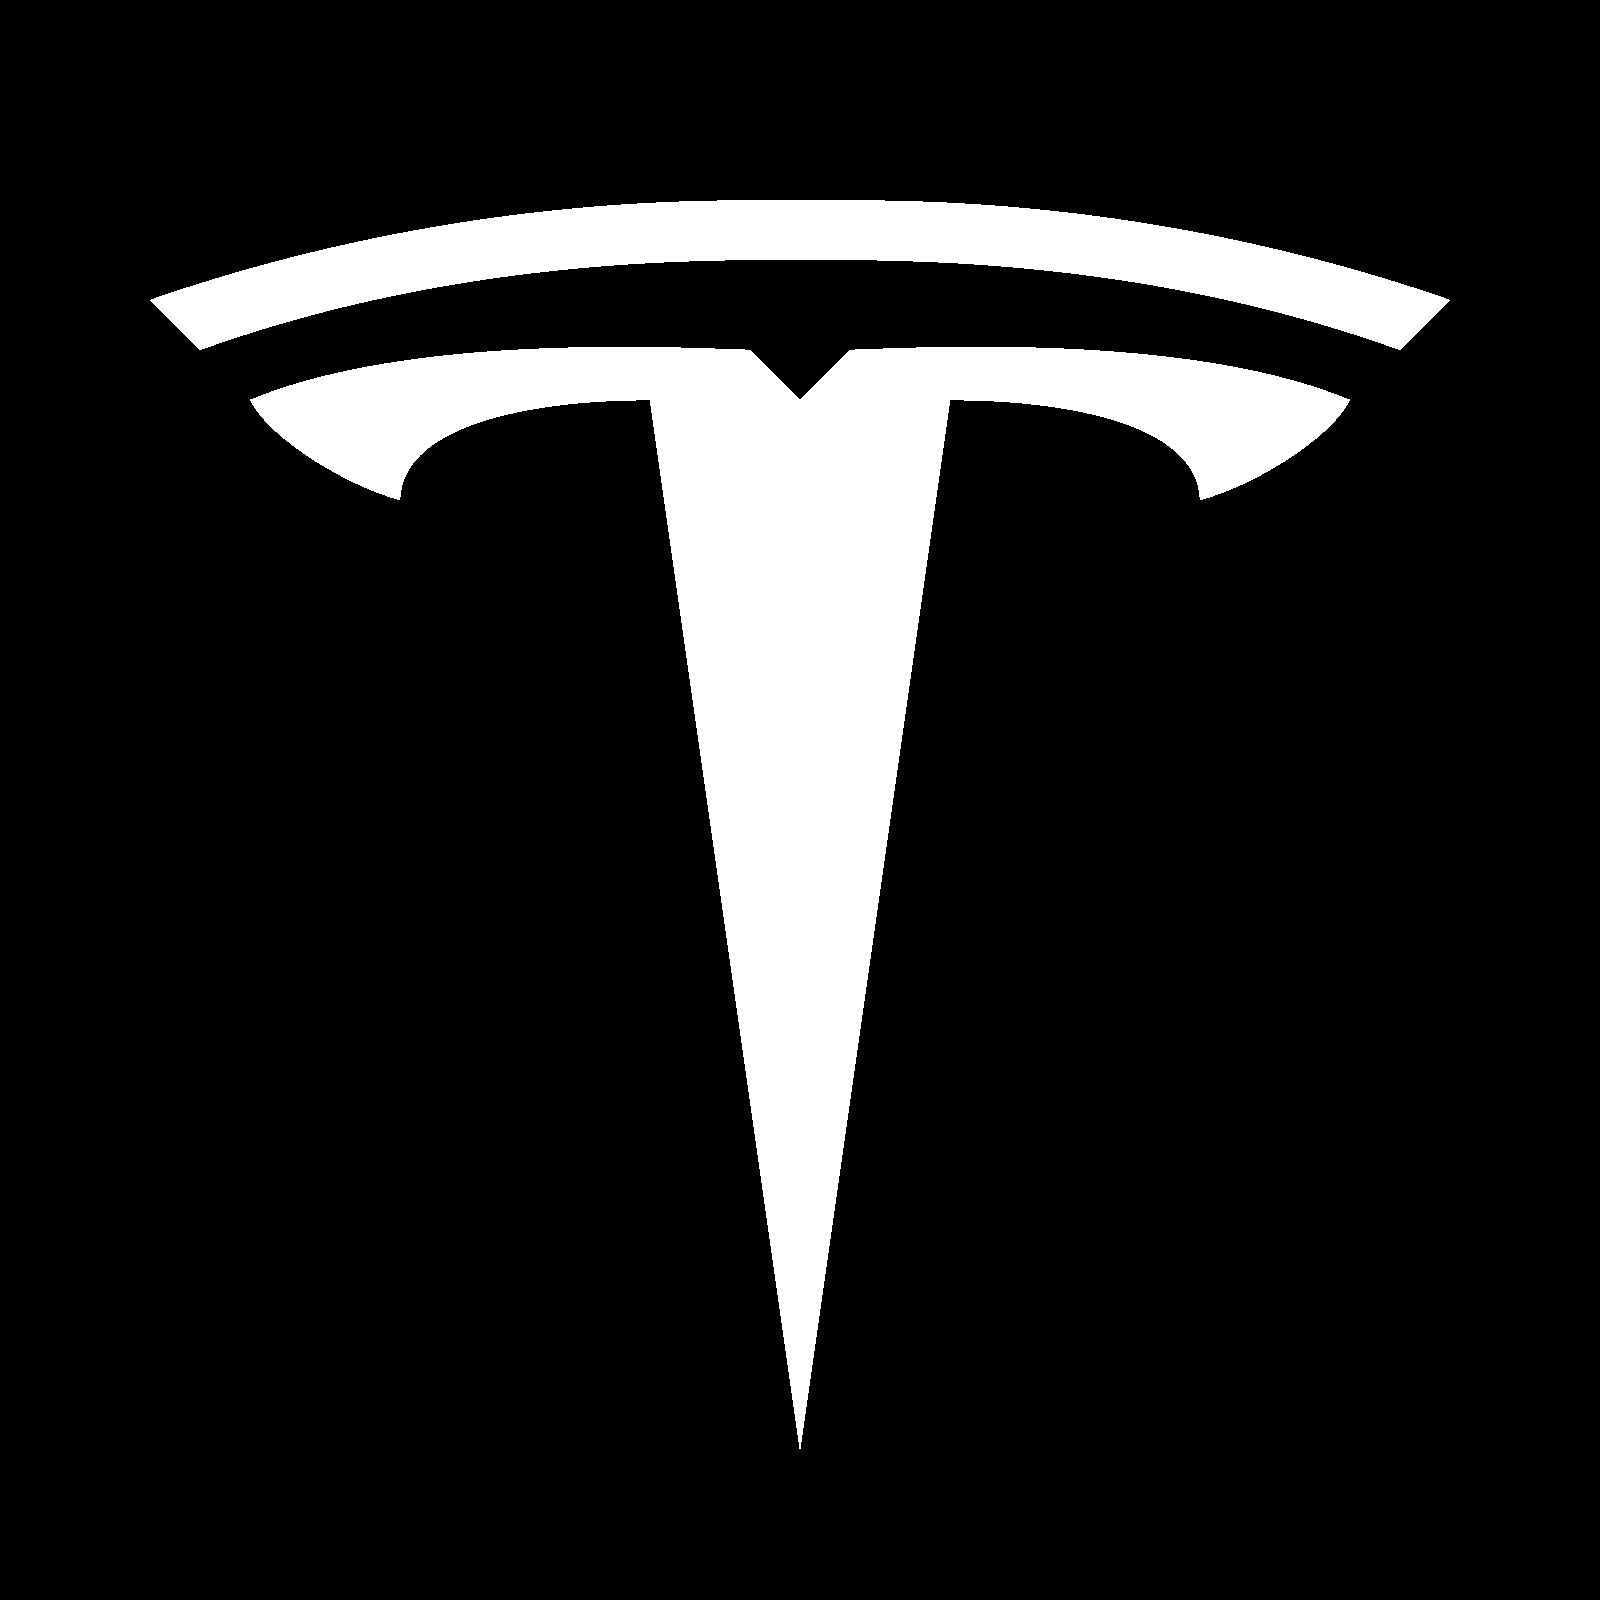

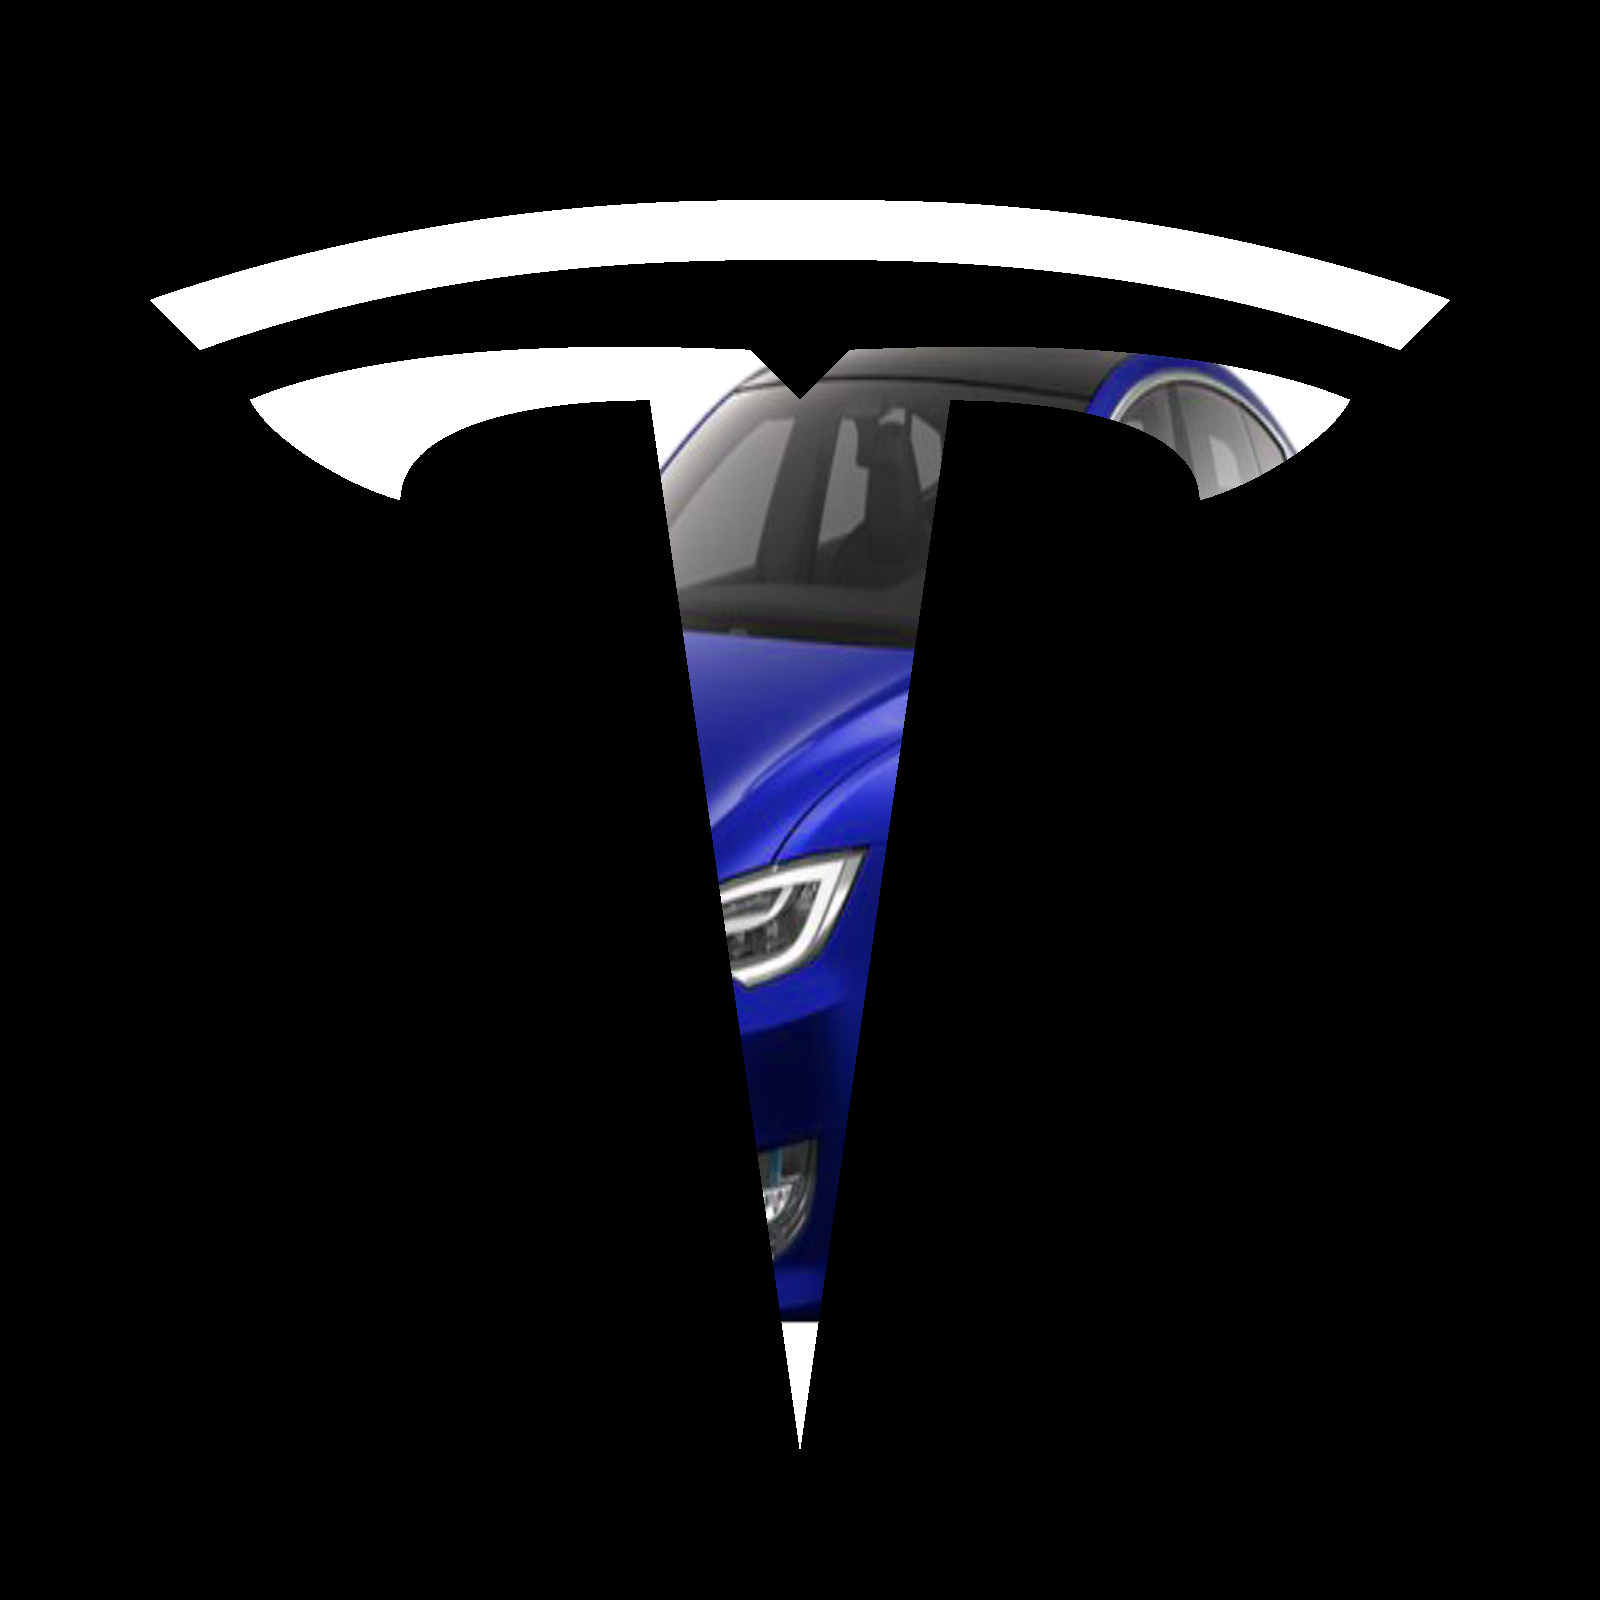

In [6]:
# Install OpenCV
!pip install opencv-python-headless

import cv2
import numpy as np
from google.colab import files
from IPython.display import display, Image as IPImage

# Prompt to upload the Tesla logo and background images
print("Upload the Tesla logo:")
logo_upload = files.upload()

print("Upload the background image:")
background_upload = files.upload()

# Load the images
logo_path = list(logo_upload.keys())[0]
background_path = list(background_upload.keys())[0]

logo = cv2.imread(logo_path, cv2.IMREAD_UNCHANGED)  # Keep transparency
background = cv2.imread(background_path)

# Resize the background to match the Tesla logo dimensions
background = cv2.resize(background, (logo.shape[1], logo.shape[0]))

# Handle alpha channel (if present) or create a grayscale mask
if logo.shape[-1] == 4:  # If logo has an alpha channel
    alpha_channel = logo[:, :, 3]  # Extract alpha channel
    _, mask = cv2.threshold(alpha_channel, 1, 255, cv2.THRESH_BINARY)  # Create binary mask
else:
    gray_logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray_logo, 50, 255, cv2.THRESH_BINARY_INV)  # Threshold black areas

# Visualize the mask for debugging
cv2.imwrite("mask_debug.png", mask)
display(IPImage("mask_debug.png"))

# Invert the mask to select black regions
mask_inv = cv2.bitwise_not(mask)

# Ensure compatibility of dimensions and channels
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
logo_no_alpha = cv2.cvtColor(logo[:, :, :3], cv2.COLOR_BGRA2BGR) if logo.shape[-1] == 4 else logo

# Isolate regions
background_region = cv2.bitwise_and(background, background, mask=mask)
logo_region = cv2.bitwise_and(logo_no_alpha, logo_no_alpha, mask=mask_inv)

# Combine the regions
custom_logo = cv2.add(background_region, logo_region)

# Save and display the result
output_path = "custom_tesla_logo_corrected.png"
cv2.imwrite(output_path, custom_logo)
display(IPImage(output_path))


Upload the Tesla logo:


Saving tesla_logo_PNG16.png to tesla_logo_PNG16 (6).png
Upload the background image:


Saving Tesla-PNG-High-Quality-Image.png to Tesla-PNG-High-Quality-Image (6).png


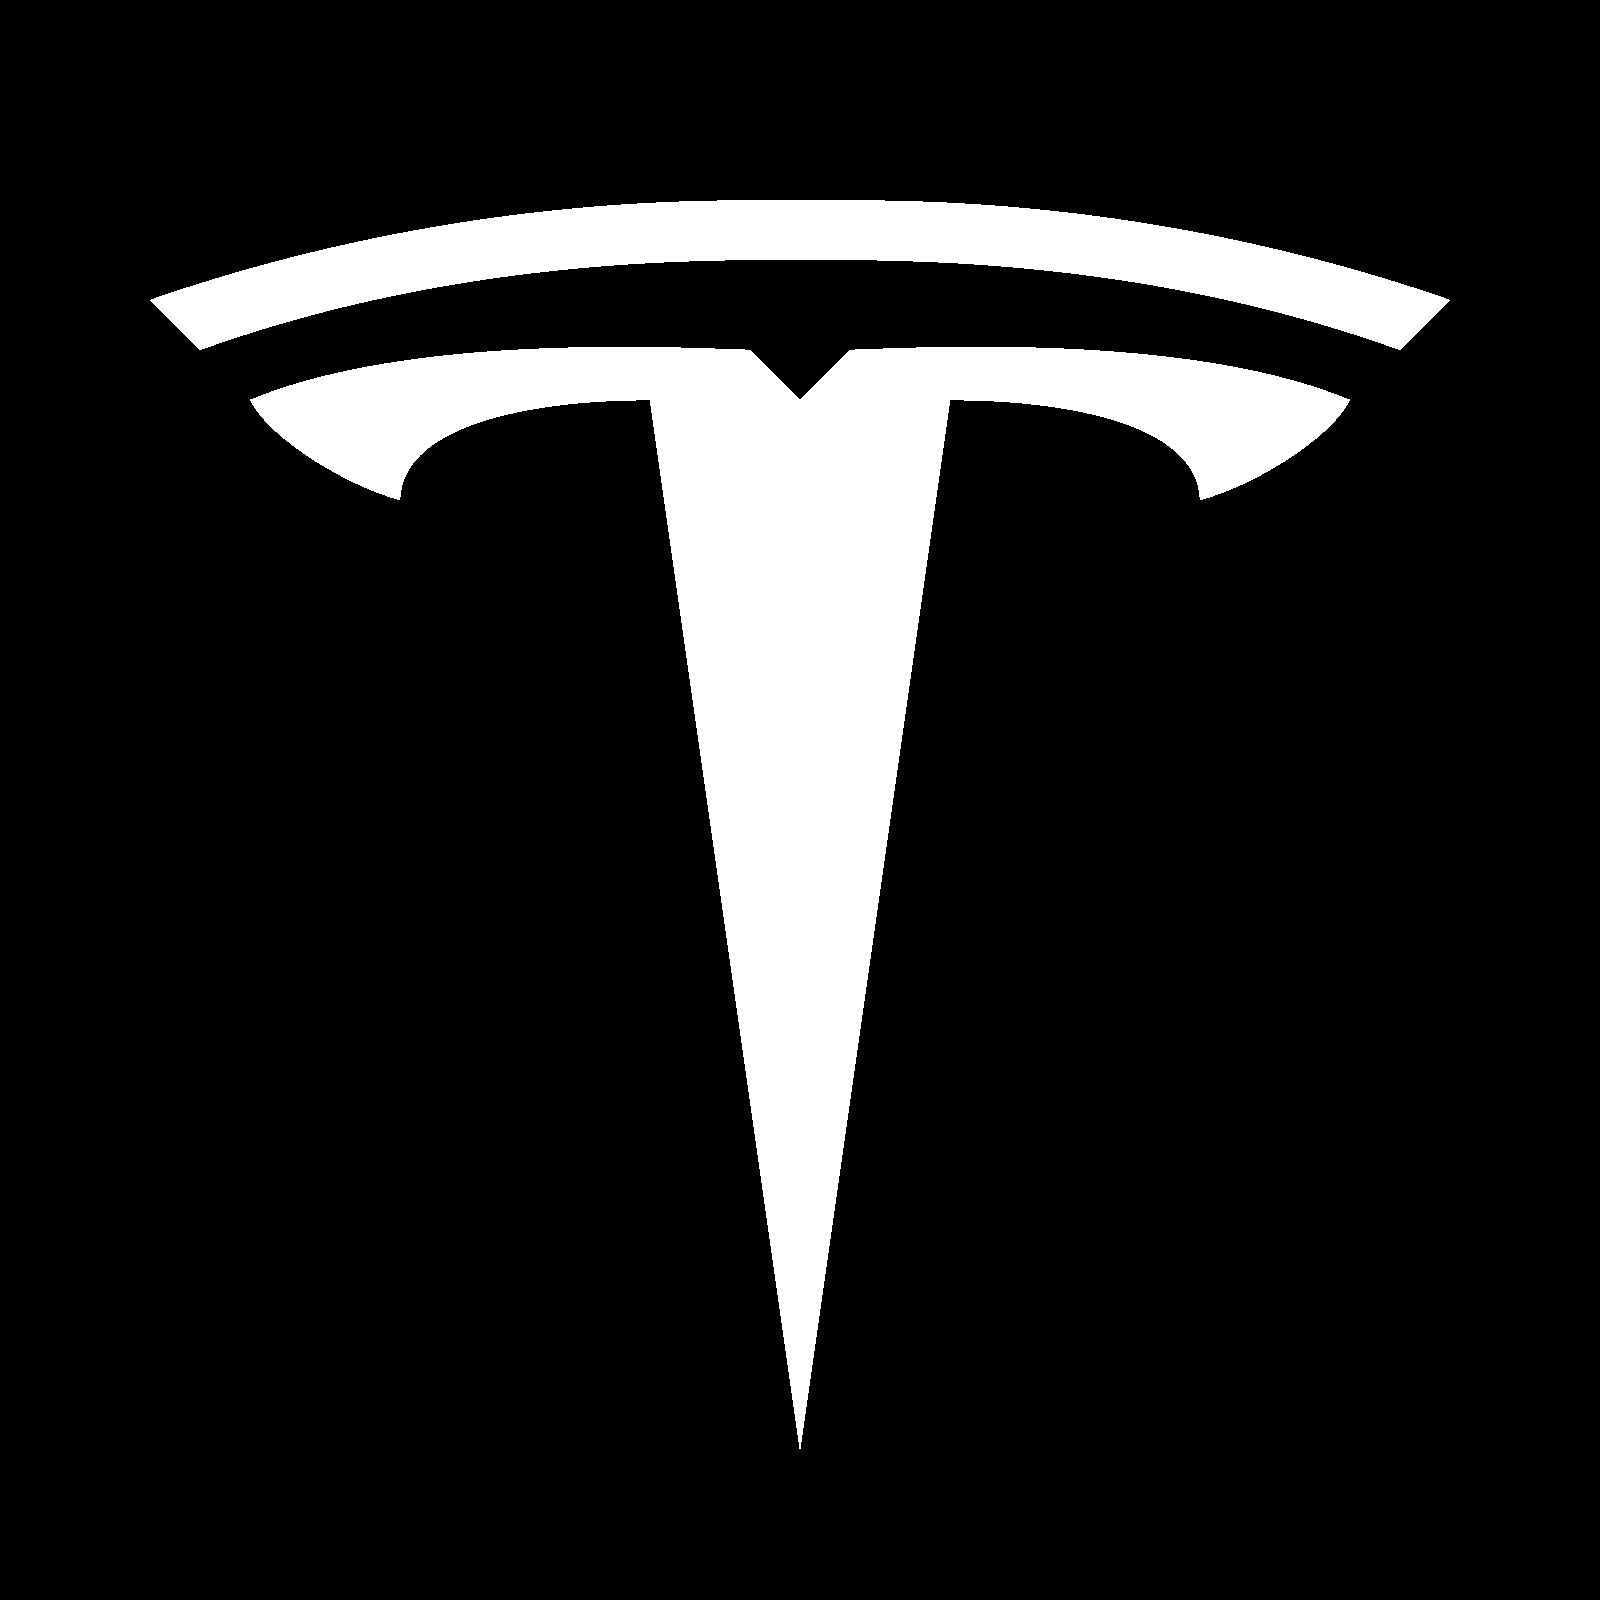

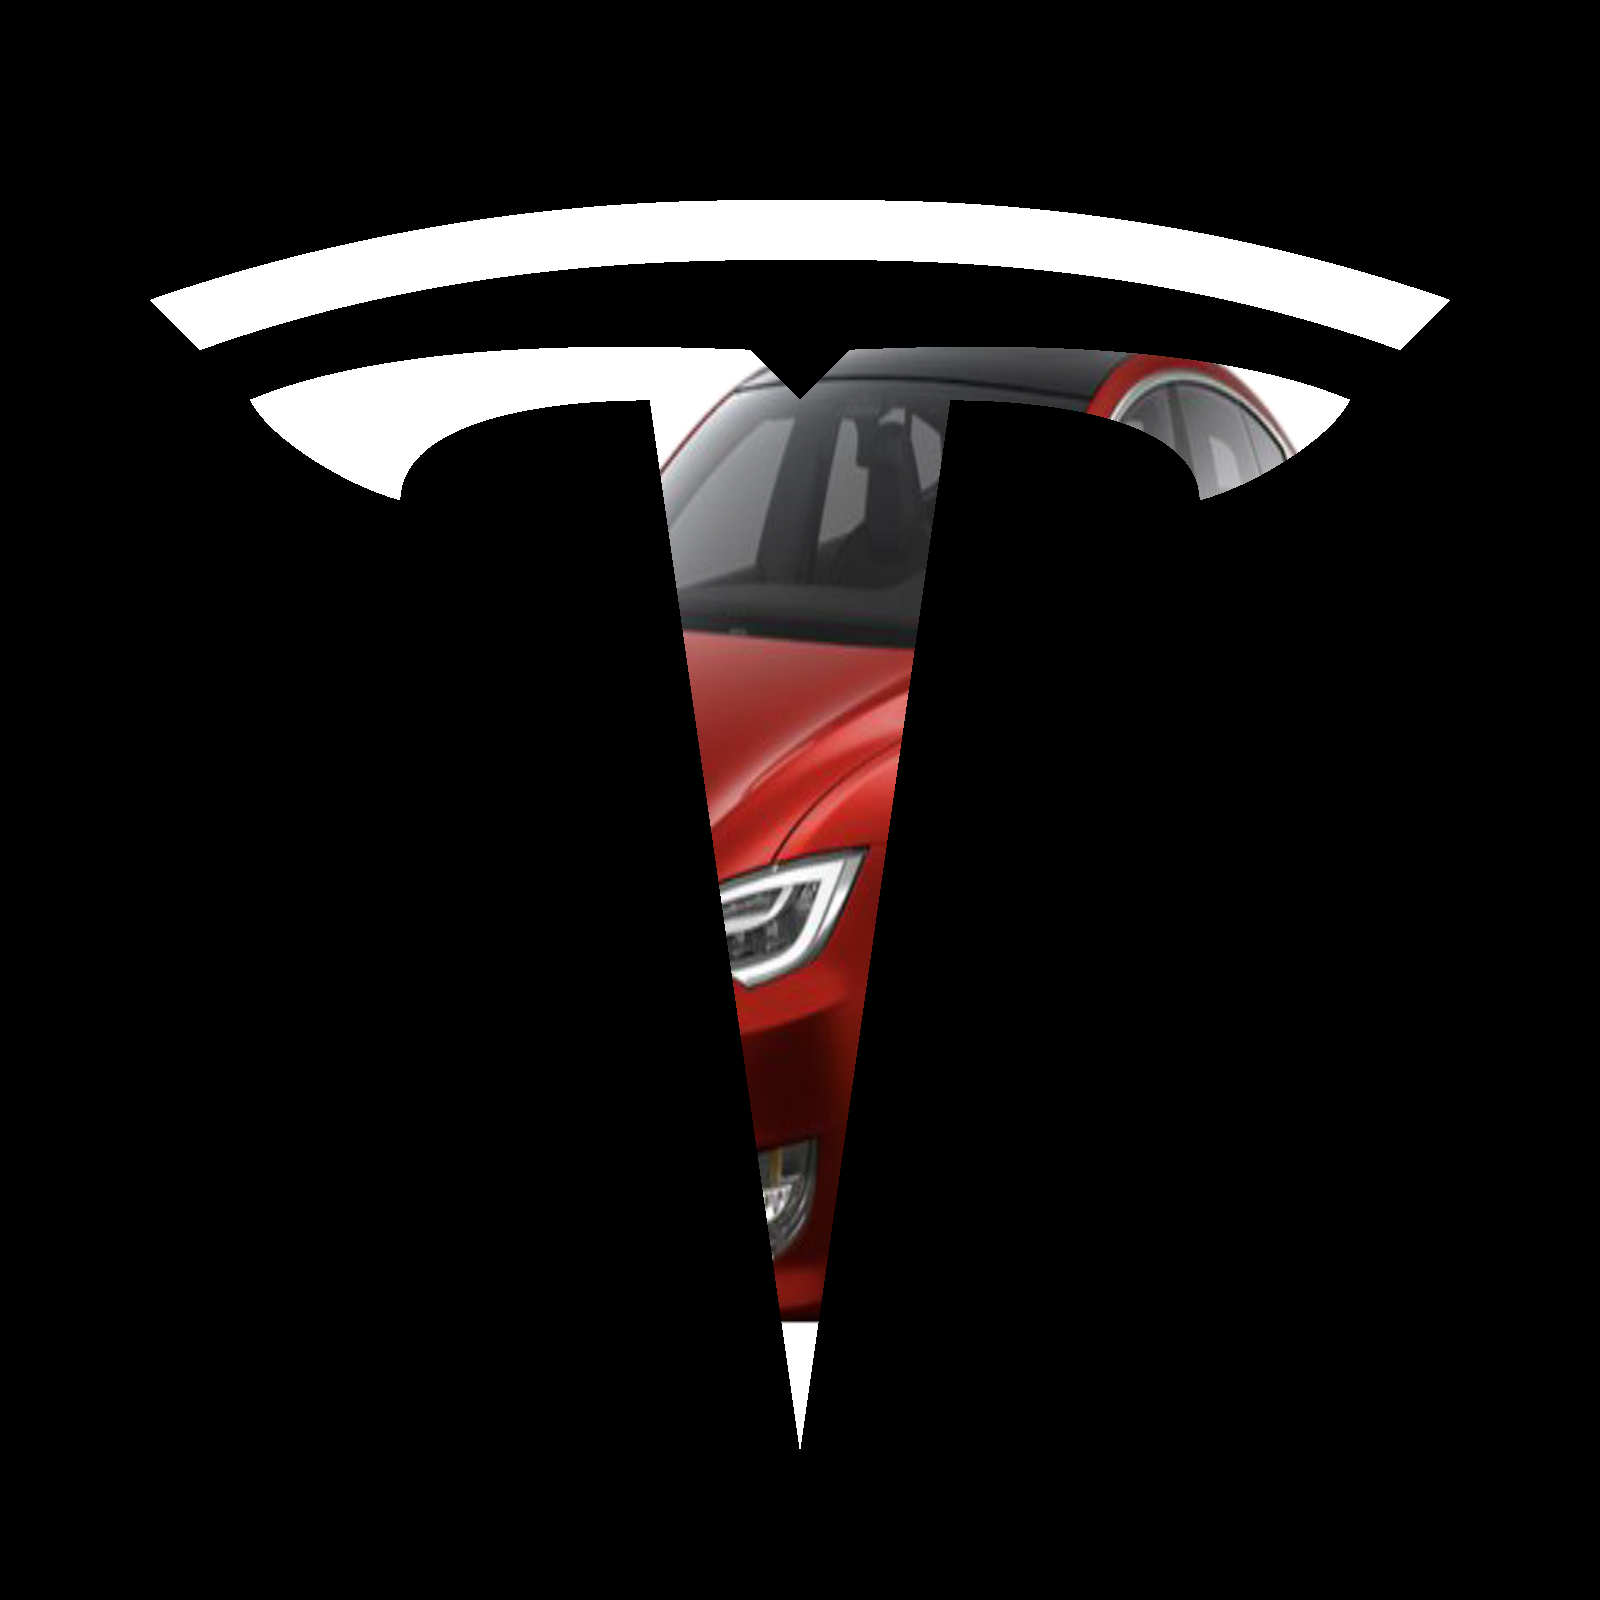

In [7]:
# Install OpenCV
!pip install opencv-python-headless

import cv2
import numpy as np
from google.colab import files
from IPython.display import display, Image as IPImage

# Prompt to upload the Tesla logo and background images
print("Upload the Tesla logo:")
logo_upload = files.upload()

print("Upload the background image:")
background_upload = files.upload()

# Load the images
logo_path = list(logo_upload.keys())[0]
background_path = list(background_upload.keys())[0]

logo = cv2.imread(logo_path, cv2.IMREAD_UNCHANGED)  # Keep transparency
background = cv2.imread(background_path)

# Resize the background to match the Tesla logo dimensions
background = cv2.resize(background, (logo.shape[1], logo.shape[0]))

# Handle alpha channel (if present) or create a grayscale mask
if logo.shape[-1] == 4:  # If logo has an alpha channel
    alpha_channel = logo[:, :, 3]  # Extract alpha channel
    _, mask = cv2.threshold(alpha_channel, 1, 255, cv2.THRESH_BINARY)  # Create binary mask
else:
    gray_logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray_logo, 50, 255, cv2.THRESH_BINARY_INV)  # Threshold black areas

# Visualize the mask for debugging
cv2.imwrite("mask_debug.png", mask)
display(IPImage("mask_debug.png"))

# Invert the mask to select black regions
mask_inv = cv2.bitwise_not(mask)

# Ensure compatibility of dimensions and channels
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
logo_no_alpha = cv2.cvtColor(logo[:, :, :3], cv2.COLOR_BGRA2BGR) if logo.shape[-1] == 4 else logo

# Isolate regions
background_region = cv2.bitwise_and(background, background, mask=mask)
logo_region = cv2.bitwise_and(logo_no_alpha, logo_no_alpha, mask=mask_inv)

# Combine the regions
custom_logo = cv2.add(background_region, logo_region)

# Convert from BGR to RGB to fix color shift
custom_logo_rgb = cv2.cvtColor(custom_logo, cv2.COLOR_BGR2RGB)

# Save and display the result
output_path = "custom_tesla_logo_corrected_color1.png"
cv2.imwrite(output_path, custom_logo_rgb)
display(IPImage(output_path))

